In [27]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [30]:
df = pd.read_csv(path_to_csv + "/AAPL.csv")

In [31]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [32]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [33]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[188.02877781 188.1497615  188.27074518 188.39172887 188.51271256
 188.63369625 188.75467994 188.87566363 188.99664731 189.117631
 189.23861469 189.35959838 189.48058207 189.60156576 189.72254945
 189.84353313 189.96451682 190.08550051 190.2064842  190.32746789
 190.44845158 190.56943526 190.69041895 190.81140264 190.93238633
 191.05337002 191.17435371 191.29533739 191.41632108 191.53730477]


In [35]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [36]:
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 18.904507300172845


In [37]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_pred , y_test)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 16.62515049558445


In [38]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.1056146483461395


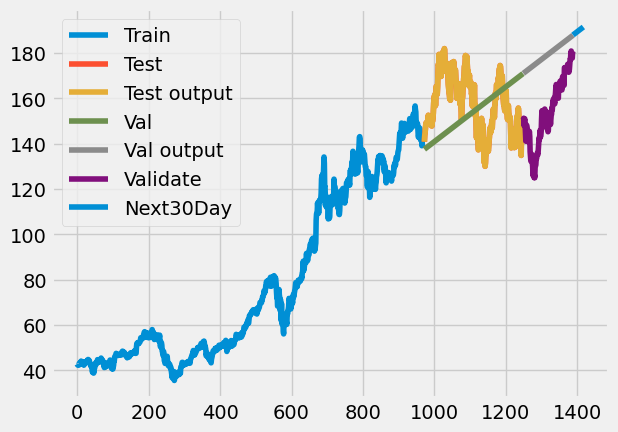

In [39]:
plt.plot(train_data.index, train_data['Close'])

plt.plot(test_data.index, test_data['Close'])

plt.plot(test_data.index, y_test)

plt.plot(test_data.index, y_pred)

plt.plot(val_data.index, y_pred_val)

plt.plot(val_data.index, y_val)

plt.plot(last_data,y_next_30_days)

plt.legend(['Train', 'Test', 'Test output',  'Val', 'Val output','Validate','Next30Day'])
plt.show()